# **Swahili Question Answering (QA) System**

## 🔍 **1.0 Business Understanding**
---
In the era of global digital transformation, access to language-based AI tools has become essential for inclusive knowledge dissemination. However, African languages, including Swahili—spoken by over 100 million people—remain underrepresented in AI advancements. There is a significant gap in question-answering (QA) systems for Swahili, which hinders educational, governmental, and healthcare access for Swahili-speaking populations. This project seeks to develop a robust QA system that can understand and answer fact-based questions in Swahili, helping bridge the digital knowledge divide for East Africa.

### ⚠️ **1.1 Challenges**

Key challenges include:

1. Lack of large-scale annotated Swahili QA datasets
2. Limited availability of pre-trained Swahili NLP models
3. High resource demands for training deep learning models
4. Linguistic complexity and variation within Swahili dialects
5. Need for domain-specific performance (education, healthcare, governance)

### 💡 **1.2 Proposed Solution**

To address these challenges, we propose:

1. Fine-tuning multilingual transformer models (e.g., mBERT, AfriBERTa) using Swahili datasets
2. Utilizing data augmentation techniques such as back-translation to expand the training set
3. Engineering linguistic features such as context-question overlap and token similarity
4. Evaluating model performance across various question types
5. Deploying a user-friendly web-based interface for real-time Swahili question answering

### ✅ **1.3 Conclusion**

By creating an intelligent QA system for Swahili, this project promotes equitable access to information and builds foundational infrastructure for AI in low-resource languages. The tool will empower Swahili speakers in education, public service, and community development through reliable, machine-generated answers to fact-based queries.

### 📌 **1.4 Problem Statement**

There is a lack of intelligent, real-time question-answering systems for Swahili, limiting access to structured information for millions in East Africa. As Shujaa Data Analytics, we have been contracted to develop a machine learning-based QA model that can interpret questions in Swahili and return accurate answers from a given context. The current manual processes of accessing knowledge are slow and language-restrictive, necessitating an automated, Swahili-native solution.

### 🎯 **1.5 Objectives**

1. To analyze question and context patterns in Swahili QA datasets
2. To extract and engineer features (e.g., question length, context overlap) for model input
3. To fine-tune a transformer-based model on Swahili QA data
4. To evaluate model accuracy across different question types and linguistic structures
5. To build and deploy a web-based interface for live QA in Swahili

## 📊 **2.0 Data Understanding**
---
### 🌐 **2.1 Data Source**

The dataset used is from KenSwQuAD, a curated Swahili QA dataset comprising 7,347 entries. It is designed to support machine learning tasks such as reading comprehension and question answering, particularly in low-resource language settings. The dataset is accessible at: KenSwQuAD GitHub (URL for illustration).

### 🧾 **2.2 Column Description**

Key features in the dataset include:

- `Story_ID`: Unique identifier for the source passage
- `context`: A paragraph of Swahili text providing information for the QA task
- `question`: A fact-based question in Swahili related to the context
- `answer`: The correct answer span within the context

### 📈 **2.3 Exploratory Data Analysis**

Let's load the data and perform initial exploration:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from datasets import Dataset
from sklearn.model_selection import train_test_split
#from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer
#from transformers import pipeline
#import evaluate

In [2]:
# Load dataset
df = pd.read_csv("data/Swahili_train.csv")
df.head()

,Unnamed: 0,Story_ID,context,question,answers
0,0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,"{'text': array(['Kenya'], dtype=object)}"
1,1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,"{'text': array(['mbolea'], dtype=object)}"
2,2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,"{'text': array(['Mahindi'], dtype=object)}"
3,3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,"{'text': array(['80%'], dtype=object)}"
4,4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': array(['Kwa vile watu watajipa kazi w...


In [3]:
# Display columns
df.columns

Index(['Unnamed: 0', 'Story_ID', 'context', 'question', 'answers'], dtype='object')

In [4]:
# Remove extra unnamed columns
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Story_ID,context,question,answers
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,"{'text': array(['Kenya'], dtype=object)}"
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,"{'text': array(['mbolea'], dtype=object)}"
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,"{'text': array(['Mahindi'], dtype=object)}"
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,"{'text': array(['80%'], dtype=object)}"
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': array(['Kwa vile watu watajipa kazi w...


In [5]:

#Display shape of dataset
df.shape

(7347, 4)

In [6]:
# Examine Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Story_ID  7347 non-null   object
 1   context   7347 non-null   object
 2   question  7347 non-null   object
 3   answers   7347 non-null   object
dtypes: object(4)
memory usage: 229.7+ KB


In [7]:
df.duplicated(subset=[col for col in df.columns if col != 'answers']).sum()

9

In [8]:
# Convert string in 'answers' column to Python dict
def clean_array_string(s):
    # Replace NumPy-style arrays with Python lists: e.g. array(['Kenya'], dtype=object) → ['Kenya']
    s = re.sub(r"array\((\[.*?\])\s*,\s*dtype=object\)", r"\1", s)
    return ast.literal_eval(s)


df['answers'] = df['answers'].astype(str).apply(clean_array_string)
df.head()

,Story_ID,context,question,answers
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,{'text': ['Kenya']}
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,{'text': ['mbolea']}
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,{'text': ['Mahindi']}
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,{'text': ['80%']}
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': ['Kwa vile watu watajipa kazi wenyewe']}


In [9]:
# Check structure of cleaned answer feature
df['answers'].apply(lambda x: isinstance(x, dict) and 'text' in x).value_counts()


True    7347
Name: answers, dtype: int64

In [10]:
# Display unique stories
df['Story_ID'].value_counts()

3830_swa    13
3213_swa    12
3252_swa    10
5199_swa    10
3211_swa    10
            ..
4807_swa     5
4777_swa     5
1528_swa     5
3174_swa     5
2924_swa     5
Name: Story_ID, Length: 1410, dtype: int64

In [11]:
# Add features
# Token count per context, question, answer
df['context_length'] = df['context'].apply(lambda x: len(x.split()))
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
df['answer_length'] = df['answers'].apply(lambda x: len(x['text'][0].split()))

# how many words in the question are found in the context
df['overlap'] = df.apply(lambda row: sum([1 for w in row['question'].split() if w in row['context'].split()]), axis=1)
df.head()

,Story_ID,context,question,answers,context_length,question_length,answer_length,overlap
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,{'text': ['Kenya']},361,7,1,6
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,{'text': ['mbolea']},361,3,1,2
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,{'text': ['Mahindi']},361,6,1,3
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,{'text': ['80%']},361,7,1,4
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': ['Kwa vile watu watajipa kazi wenyewe']},361,9,6,6


In [12]:
df.describe()

,context_length,question_length,answer_length,overlap
count,7347.000000,7347.000000,7347.000000,7347.000000
mean,402.879270,6.280795,2.297673,3.544440
std,240.518781,2.030858,2.057967,2.033889
min,75.000000,2.000000,1.000000,0.000000
25%,246.000000,5.000000,1.000000,2.000000
50%,338.000000,6.000000,1.000000,3.000000
75%,478.000000,8.000000,3.000000,5.000000
max,1583.000000,18.000000,18.000000,17.000000


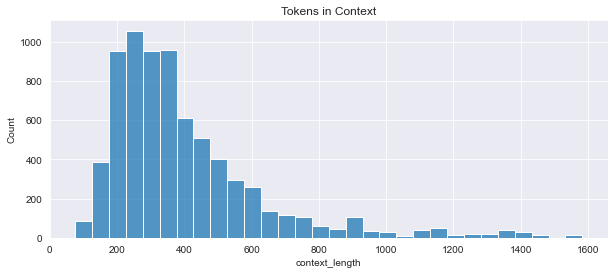

In [13]:
# Visualize distributions
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['context_length'], bins=30)
plt.title("Tokens in Context")
plt.show()


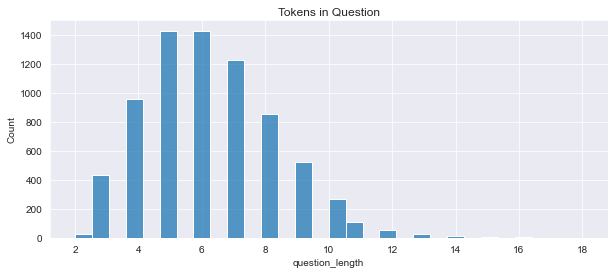

In [14]:
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['question_length'], bins=30)
plt.title("Tokens in Question")
plt.show()

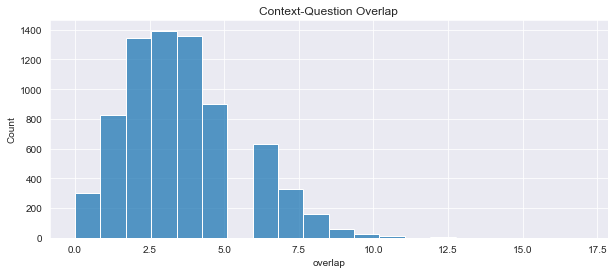

In [15]:
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['overlap'], bins=20)
plt.title("Context-Question Overlap")
plt.show()